<a href="https://colab.research.google.com/github/DarielCuba/ProgW/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precisión del modelo Random Forest: 100.00%
Precisión del modelo Support Vector Machine: 96.67%
Precisión del modelo K-Nearest Neighbors: 100.00%

Validación Cruzada - Random Forest:     Promedio = 96.67%    Desviación Estándar = 0.02
Validación Cruzada - Support Vector Machine: Promedio = 96.67%   Desviación Estándar = 0.03
Validación Cruzada - K-Nearest Neighbors:    Promedio = 95.33%    Desviación Estándar = 0.03


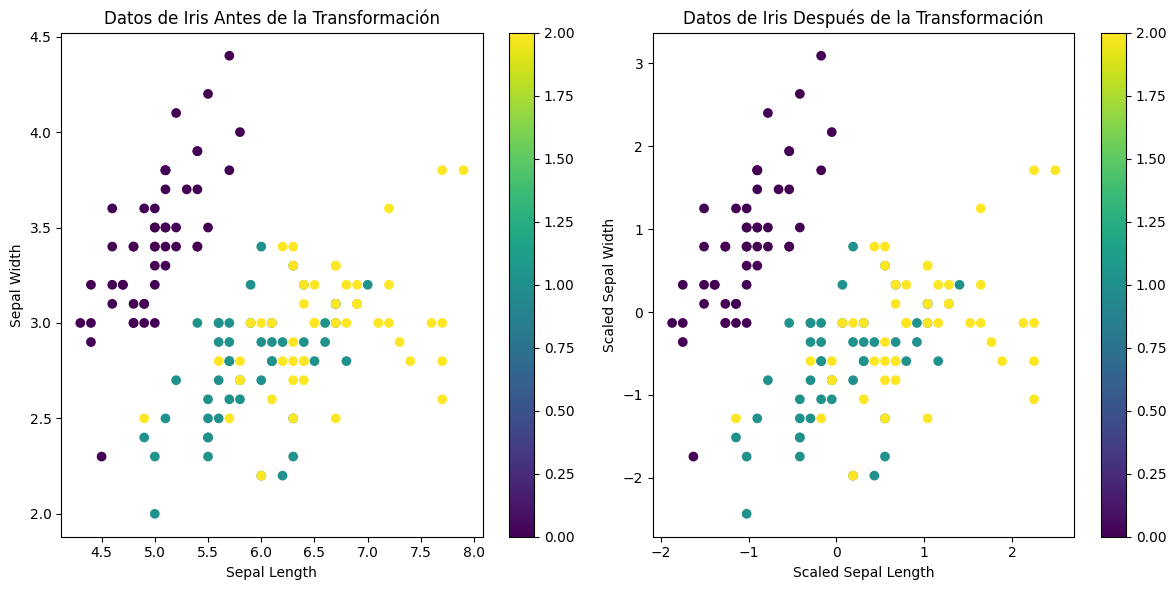

In [17]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset de Iris
iris = load_iris()
X = iris.data
y = iris.target

# Mapeo de etiquetas a valores numéricos
class_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_num = y

# Normalización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_num, test_size=0.2, random_state=42)

# Modelos de Aprendizaje Automático
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión del modelo Random Forest: {:.2f}%".format(accuracy_rf * 100))

# SVM
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Precisión del modelo Support Vector Machine: {:.2f}%".format(accuracy_svm * 100))

# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Precisión del modelo K-Nearest Neighbors: {:.2f}%".format(accuracy_knn * 100))

# Validación Cruzada
rf_scores = cross_val_score(rf_model, X_scaled, y_num, cv=5)
svm_scores = cross_val_score(svm_model, X_scaled, y_num, cv=5)
knn_scores = cross_val_score(knn_model, X_scaled, y_num, cv=5)

print("\nValidación Cruzada - Random Forest:     Promedio = {:.2f}%    Desviación Estándar = {:.2f}".format(np.mean(rf_scores) * 100, np.std(rf_scores)))
print("Validación Cruzada - Support Vector Machine: Promedio = {:.2f}%   Desviación Estándar = {:.2f}".format(np.mean(svm_scores) * 100, np.std(svm_scores)))
print("Validación Cruzada - K-Nearest Neighbors:    Promedio = {:.2f}%    Desviación Estándar = {:.2f}".format(np.mean(knn_scores) * 100, np.std(knn_scores)))

# Visualización de los datos antes y después de la transformación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_num, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Datos de Iris Antes de la Transformación')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_num, cmap='viridis')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Sepal Width')
plt.title('Datos de Iris Después de la Transformación')
plt.colorbar()

plt.tight_layout()
plt.show()